# Reinforcement Learning - Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset.shape[1])

10


## Implementing the UCB algorithm

In [97]:
# This is my attemt to implement the UCB algorithm. It is not going good, nut I will come back to it later
# import math

# rows = dataset.shape[0]
# cols = dataset.shape[1]

# d = {
#     'a1': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a2': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a3': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a4': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a5': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a6': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a7': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a8': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a9': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
#     'a10': {'n_sel': 0, 'r': 0, 'av_r': 0, 'di': 0, 'ub': 0},
# }

# def calc_ad(n, n_sel, r):
#     av_r = 0
#     di = 0
#     if n > 0:
#         av_r = r/n_sel
#         di = math.sqrt(3 / 2 * math.log(n + 1) / n_sel)
#         ub = av_r + di
#     else:
#         ub = 1e400
        
#     return (av_r, di, ub)

# for n in range(0, rows):
#     user = dataset.iloc[n].values
#     for ad in range(0, cols):
#         user_ad = ad + 1
#         ad_idx = 'a' + str(user_ad)
#         if user[ad] == 1:
#             d[ad_idx]['n_sel'] += 1
#             d[ad_idx]['r'] += 1
#         print(calc_ad(n, d[ad_idx]['n_sel'], d[ad_idx]['r']))
# print(d)

import math

# N = dataset.shape[0]
N = 1000
D = dataset.shape[1]
ads_selected = []
nums_of_selections = [0] * D
sums_of_rewards = [0] * D
# total_reward = 0

for n in range(0, N):
    current_ad = 0
    max_ucb = 0
    
    for d in range (0, D):
        if nums_of_selections[d] > 0:
            avrg_reward = sums_of_rewards[d] / nums_of_selections[d]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / nums_of_selections[d])
            ucb = avrg_reward + delta_i
        else:
            ucb = 1e400
        
        if ucb > max_ucb:
            max_ucb = ucb
            current_ad = d
        
    ads_selected.append(current_ad)
    nums_of_selections[current_ad] += 1
    reward = dataset.iloc[n, current_ad]
    sums_of_rewards[current_ad] += reward
#     total_reward += reward

## Visualise the results

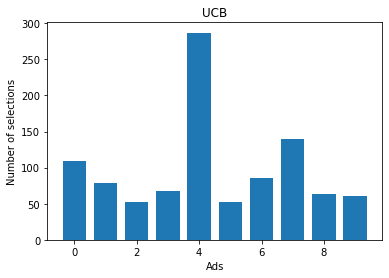

In [98]:
bin = [*range(0, 11, 1)]
plt.hist(ads_selected, rwidth = 0.75, align='left', bins = bin)
plt.title('UCB')
plt.xlabel('Ads')
plt.ylabel('Number of selections')
plt.show()